In [ ]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense


In [ ]:
data=pd.read_csv('CAISO_NORTH_2022-02_MOER - CAISO_NORTH_2022-02_MOER.csv.csv')

In [ ]:
data

,timestamp,MOER,MOER version,frequency
0,2022-02-01T00:00:00+00:00,975,3,300
1,2022-02-01T00:05:00+00:00,967,3,300
2,2022-02-01T00:10:00+00:00,960,3,300
3,2022-02-01T00:15:00+00:00,966,3,300
4,2022-02-01T00:20:00+00:00,966,3,300
...,...,...,...,...
8059,2022-02-28T23:35:00+00:00,408,3,300
8060,2022-02-28T23:40:00+00:00,204,3,300
8061,2022-02-28T23:45:00+00:00,202,3,300
8062,2022-02-28T23:50:00+00:00,306,3,300


In [ ]:
#median_MOER = data['MOER'].median()
#data['MOER'] = np.where(data['MOER'] < 750, median_MOER, data['MOER'])

In [ ]:
#data1=pd.read_csv('data1.csv')
#median_MOER1 = data1['MOER'].median()
#data1['MOER'] = np.where(data1['MOER'] < 750, median_MOER1, data1['MOER'])

In [ ]:
data['MOER']

0       975
1       967
2       960
3       966
4       966
       ... 
8059    408
8060    204
8061    202
8062    306
8063    245
Name: MOER, Length: 8064, dtype: int64

In [ ]:
24*12*24

6912

In [ ]:
data.iloc[6912+9*12-3:7030]

,timestamp,MOER,MOER version,frequency
7017,2022-02-25T08:45:00+00:00,995,3,300
7018,2022-02-25T08:50:00+00:00,995,3,300
7019,2022-02-25T08:55:00+00:00,995,3,300
7020,2022-02-25T09:00:00+00:00,997,3,300
7021,2022-02-25T09:05:00+00:00,1013,3,300
7022,2022-02-25T09:10:00+00:00,966,3,300
7023,2022-02-25T09:15:00+00:00,960,3,300
7024,2022-02-25T09:20:00+00:00,952,3,300
7025,2022-02-25T09:25:00+00:00,949,3,300
7026,2022-02-25T09:30:00+00:00,946,3,300


In [ ]:
X_test = np.array([data['MOER'][5912+9*12:6912+9*12]])


In [ ]:
y_test=np.array([data['MOER'][6912+9*12:6912+9*12+288]])

In [ ]:
#data1

In [ ]:
#data_test= data1['MOER']

In [ ]:
data_model= data['MOER']

In [ ]:
data_model[:10]

0     41
1     41
2     41
3     40
4     39
5     38
6     38
7     37
8    651
9    741
Name: MOER, dtype: int64

In [ ]:
def prepare_data(data, n_prev=1000):
    X, y = [], []
    values = data_model.values
    for i in range(n_prev, len(data)-288):
        X.append(values[i-n_prev:i].tolist())
        y.append(values[i:i+288].tolist())
    return np.array(X), np.array(y)



In [ ]:
train_size = int(len(data) * 0.8)
train_data = data_model.iloc[:train_size]
test_data = data_model.iloc[train_size:]


In [ ]:
X_train, y_train= prepare_data(train_data)
X_test, y_test = prepare_data(test_data)


In [ ]:
X_train.shape

(5163, 1000)

In [ ]:
X_test

array([[ 41,  41,  41, ..., 861, 919, 926],
       [ 41,  41,  40, ..., 919, 926, 930],
       [ 41,  40,  39, ..., 926, 930, 932],
       ...,
       [841, 841, 842, ..., 872, 852, 845],
       [841, 842, 833, ..., 852, 845, 965],
       [842, 833, 839, ..., 845, 965, 979]])

In [ ]:
y_train

array([[930, 932, 933, ..., 912, 928, 932],
       [932, 933, 933, ..., 928, 932, 934],
       [933, 933, 934, ..., 932, 934, 935],
       ...,
       [864, 865, 814, ..., 117, 862,  44],
       [865, 814, 760, ..., 862,  44, 333],
       [814, 760, 758, ...,  44, 333, 305]])

In [ ]:
data.loc[100:200]

,timestamp,MOER,MOER version,frequency
100,2022-05-01T08:20:00+00:00,858,3,300
101,2022-05-01T08:25:00+00:00,863,3,300
102,2022-05-01T08:30:00+00:00,861,3,300
103,2022-05-01T08:35:00+00:00,861,3,300
104,2022-05-01T08:40:00+00:00,860,3,300
...,...,...,...,...
196,2022-05-01T16:20:00+00:00,35,3,300
197,2022-05-01T16:25:00+00:00,35,3,300
198,2022-05-01T16:30:00+00:00,35,3,300
199,2022-05-01T16:35:00+00:00,35,3,300


In [ ]:
#X_TEST_OVERFIT,Y_TEST_OVERFIT = prepare_data(data_test)


In [ ]:
model = Sequential()
model.add(Dense(1000, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(800, activation='relu'))
model.add(Dense(700, activation='linear'))
model.add(Dense(580, activation='relu'))
model.add(Dense(520, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(350, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(288, activation='linear'))
model.compile(loss='huber', optimizer='adam')


In [ ]:
y_train.shape

(5163, 288)

In [ ]:
X_test

array([[ 975,  967,  960, ..., 1095, 1084, 1075],
       [ 967,  960,  966, ..., 1084, 1075, 1073],
       [ 960,  966,  966, ..., 1075, 1073, 1069],
       ...,
       [ 988,  988,  988, ...,  981,  979, 1035],
       [ 988,  988, 1003, ...,  979, 1035, 1038],
       [ 988, 1003, 1007, ..., 1035, 1038, 1043]])

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
146/146 [==============================] - 13s 76ms/step - loss: 199.9315 - val_loss: 129.4747
Epoch 2/50
146/146 [==============================] - 10s 68ms/step - loss: 125.7609 - val_loss: 107.4102
Epoch 3/50
146/146 [==============================] - 10s 71ms/step - loss: 108.8842 - val_loss: 107.1562
Epoch 4/50
146/146 [==============================] - 11s 72ms/step - loss: 107.1545 - val_loss: 129.5890
Epoch 5/50
146/146 [==============================] - 11s 74ms/step - loss: 100.9075 - val_loss: 96.8177
Epoch 6/50
146/146 [==============================] - 11s 74ms/step - loss: 103.8854 - val_loss: 106.8759
Epoch 7/50
146/146 [==============================] - 10s 68ms/step - loss: 102.3086 - val_loss: 103.8132
Epoch 8/50
146/146 [==============================] - 10s 71ms/step - loss: 102.2304 - val_loss: 118.3360
Epoch 9/50
146/146 [==============================] - 11s 73ms/step - loss: 98.4087 - val_loss: 100.7105
Epoch 10/50
146/146 [===========================

In [ ]:
y_pred=model.predict(X_test)

38/38 [==============================] - 1s 14ms/step


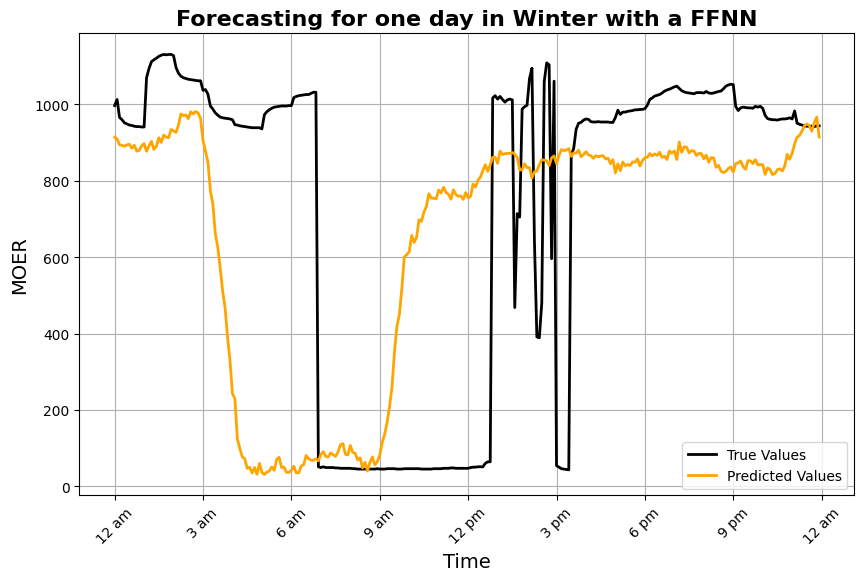

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(y_test[0], label='True Values', color='black',linewidth=2)
ax.plot(y_pred[0], label='Predicted Values', color='orange',linewidth=2)
ax.legend()
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('MOER', fontsize=14)

ax.set_title('Forecasting for one day in Winter with a FFNN',fontweight='bold', fontsize=16)

plt.grid()


x_ticks = np.arange(0, 288+36, 36) 
x_labels = ['12 am', '3 am','6 am', '9 am','12 pm','3 pm','6 pm','9 pm','12 am']
plt.xticks(x_ticks, x_labels, rotation=45)


plt.show()


In [ ]:
import numpy as np

def huber_loss(y_true, y_pred, delta=1.0):
    diff = np.abs(y_true - y_pred)
    delta_mask = diff <= delta
    squared_loss = 0.5 * np.square(diff)
    linear_loss = delta * (diff - 0.5 * delta)
    loss = np.where(delta_mask, squared_loss, linear_loss)
    return np.mean(loss)


delta = 1.0 
huber_loss_value = huber_loss(y_test[0], y_pred[0], delta=delta)

print("Huber Loss:", huber_loss_value)


Huber Loss: 320.59836852550507


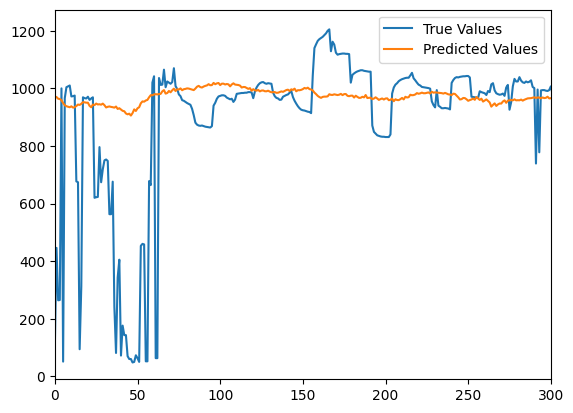

In [ ]:
plt.plot(y_test[:,5], label='True Values')
plt.plot(y_pred[:,5], label='Predicted Values')
plt.xlim(0,300)
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Y_PRED_OVERFIT, color='r',label='predicted values')
plt.plot(Y_TEST_OVERFIT, color='g',label='real values')
plt.xlabel('Number of the prediction')
plt.ylabel('MOER')
plt.legend()
plt.title('Predictions one step ahead')
plt.xlim(0,300)

NameError: ignored

In [ ]:
X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [ ]:
X_train.shape

(6631, 500)

In [ ]:
y_train_rnn = y_train.reshape(y_train.shape[0], y_train.shape[1], 1)

In [ ]:
y_train.shape

(6631, 288)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(300, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=True))
model.add(Dense(150, activation='relu'))
model.add(LSTM(150))
model.add(Dense(288))
model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
  3/208 [..............................] - ETA: 6:16 - loss: 950403.5000

KeyboardInterrupt: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import RMSprop

model = Sequential()
model.add(LSTM(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(350, activation='relu'))
model.add(Dense(288, activation='relu'))

model.compile(loss='mse', optimizer=RMSprop())
model.fit(X_train_rnn, y_train, epochs=50, batch_size=32)


Epoch 1/50
 24/208 [==>...........................] - ETA: 1:00 - loss: 949032.0000

KeyboardInterrupt: ignored

In [ ]:
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
y_pred_rnn = model.predict(X_test_rnn)

In [ ]:
# Plot predicted and true values for the first variable
plt.plot(y_test[:,5], label='True Values')
plt.plot(y_pred_rnn[:,5], label='Predicted Values')
plt.legend()
plt.xlim(0,300)
plt.show()


In [ ]:
### PREDICTIONS OF 24 STEPS AHEAD
X_test_long=X_test[100]

y_pred_long = model.predict(X_test_long.reshape(1, -1))[0]

predictions = [y_pred_long]


for i in range(1,24):
    
    X_test_long= np.roll(X_test_long, -1)
    X_test_long[-1] = y_pred_long
    
    
    y_pred_long = model.predict(X_test_long.reshape(1, -1))[0]
    
    
    predictions.append(y_pred_long)


In [ ]:
predictions = np.array([x[0] for x in predictions])


In [ ]:
import matplotlib.pyplot as plt
plt.plot(predictions, color='r',label='predicted values')
plt.plot(y_test[100:124], color='g',label='real values')

plt.ylabel('MOER')
plt.legend()


In [ ]:
### lstm

In [ ]:
def prepare_data(data, n_prev=24, n_future=24):
    X, y = [], []
    for i in range(n_prev, len(data)-n_future+1):
        X.append(data.iloc[i-n_prev:i])
        y.append(data.iloc[i:i+n_future])
    return np.array(X), np.array(y)

X,y = prepare_data(data_model)

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten


In [ ]:
train_size = int(len(X) * 0.7)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
X_train.shape

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(LSTM(42, return_sequences=True))
model.add(LSTM(37))
model.add(Dense(32, activation='relu'))
model.add(Dense(24))
model.compile(loss='mse', optimizer='adam')
model.summary()


In [ ]:
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test[0], color='r')
plt.plot(y_pred[0], color='g')
plt.show()

In [ ]:
# initialisation des données d'entrée pour la prédiction
x_input = X_test[0]
# préparation d'une liste vide pour stocker les prévisions futures
predictions = []
# nombre de prévisions futures
n_steps = 24

# boucle pour faire des prévisions futures
for i in range(n_steps):
    # prédiction de la prochaine valeur en utilisant les données d'entrée actuelles
    yhat = model.predict(x_input.reshape(1, n_prev, 1), verbose=0)
    # stockage de la prédiction dans une liste
    predictions.append(yhat[0][0])
    # mise à jour des données d'entrée pour la prochaine itération de la boucle
    x_input = np.concatenate((x_input[1:], yhat), axis=None)

# affichage des prévisions futures
print(predictions)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Créer les données d'entraînement
# X est une séquence de données d'entrée (ici, 4 variables d'entrée)
# y est la variable de sortie à prédire
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]*X_train.shape[3]))

y_train = np.random.rand(100, 1)

# Définir le modèle
model = Sequential()
model.add(LSTM(32, input_shape=(None, 5)))
model.add(Dense(1))

# Compiler le modèle
model.compile(optimizer='adam', loss='mse')

# Entraîner le modèle en utilisant la prédiction précédente comme entrée pour la prochaine prédiction
for i in range(1, len(X_train)):
    X_seq = np.expand_dims(X_train[:i], axis=0)
    y_seq = np.expand_dims(y_train[:i], axis=0)
    model.train_on_batch(X_seq, y_seq)
    prev_pred = model.predict(X_seq[:, -1:, :])
    X_train[i, 0, -1] = prev_pred

# Faire une prédiction
X_test = np.random.rand(1, 5, 4)
for i in range(1, 5):
    prev_pred = model.predict(X_test[:, i-1:i, :])
    X_test[:, i, -1] = prev_pred
y_pred = model.predict(X_test)
print(y_pred)


In [ ]:
import requests
from requests.auth import HTTPBasicAuth

login_url = 'https://api2.watttime.org/v2/login'
token = requests.get(login_url, auth=HTTPBasicAuth('freddo', 'the_frog')).json()['token']

data_url = 'https://api2.watttime.org/v2/data'
headers = {'Authorization': 'Bearer {}'.format(token)}
params = {'ba': 'CAISO_NORTH', 
          'starttime': '2022-11-16T20:30:00-0800', 
          'endtime': '2022-11-16T20:45:00-0800'}
rsp = requests.get(data_url, headers=headers, params=params)
print(rsp.text)


JSONDecodeError: ignored